In [2]:
#import dependencies
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.datasets import fashion_mnist,cifar10
from keras import regularizers
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
#load data
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
#normalise
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [5]:
#to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
#architecture
model_base=Sequential()
model_base.add(Flatten(input_shape=(32,32,3))) #first layer
model_base.add(Dense(1024,activation='relu'))#hidden layer
model_base.add(Dense(512,activation='relu'))
model_base.add(Dense(256,activation='relu'))
model_base.add(Dense(128,activation='relu'))
model_base.add(Dense(64,activation='relu'))
model_base.add(Dense(10,activation='softmax')) #outout layer

c:\Users\rekha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
#compile
model_base.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [9]:
#train
m1=model_base.fit(x_train,y_train,epochs=11,batch_size=128,validation_split=0.2)

Epoch 1/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.3697 - loss: 1.7463 - val_accuracy: 0.3845 - val_loss: 1.7092
Epoch 2/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 144ms/step - accuracy: 0.4066 - loss: 1.6491 - val_accuracy: 0.4054 - val_loss: 1.6664
Epoch 3/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.4303 - loss: 1.5848 - val_accuracy: 0.4313 - val_loss: 1.6134
Epoch 4/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.4464 - loss: 1.5464 - val_accuracy: 0.4523 - val_loss: 1.5474
Epoch 5/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - accuracy: 0.4594 - loss: 1.5042 - val_accuracy: 0.4259 - val_loss: 1.5929
Epoch 6/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.4780 - loss: 1.4636 - val_accuracy: 0.4670 - val_loss: 1.5048
Epoch 7/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.4877 - loss: 1.4284 - val_accuracy: 0.4735 - val_loss: 1.4808
Epoch 8/11
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 121ms/step - accuracy: 0.5000 - loss: 1.

In [20]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4852 - loss: 1.4639


In [21]:
#MODEL with 12 regulizer(le-4) and dropout
#architecture
model_le4=Sequential()
model_le4.add(Flatten(input_shape=(32,32,3))) #first layer
model_le4.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))#hidden layer
model_le4.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model_le4.add(Dense(10,activation='softmax')) #outout layer

In [22]:
#compile
model_le4.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [13]:
#train
m2=model_le4.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 99ms/step - accuracy: 0.2784 - loss: 2.1369 - val_accuracy: 0.3205 - val_loss: 1.9940
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.3661 - loss: 1.8533 - val_accuracy: 0.3789 - val_loss: 1.8145
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 167ms/step - accuracy: 0.3910 - loss: 1.7672 - val_accuracy: 0.4038 - val_loss: 1.7276
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.4246 - loss: 1.6854 - val_accuracy: 0.4243 - val_loss: 1.6750
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.4450 - loss: 1.6192 - val_accuracy: 0.4369 - val_loss: 1.6700
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.4600 - loss: 1.5806 - val_accuracy: 0.4610 - val_loss: 1.5871
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.4710 - loss: 1.5505 - val_accuracy: 0.4532 - val_loss: 1.5959
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 132ms/step - accuracy: 0.4794 - loss: 1.

In [14]:
#evaluate
loss,test_accuracy=model_base.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.4852 - loss: 1.4639


In [15]:
#MODEL 3
#MODEL with 12 regulizer(le-2) and dropout
#architecture
model_le2=Sequential()
model_le2.add(Flatten(input_shape=(32,32,3))) #first layer
model_le2.add(Dense(1024,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))#hidden layer
model_le2.add(Dense(512,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(128,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-2)))
model_le2.add(Dense(10,activation='softmax')) #outout layer

In [16]:
#compile
model_le2.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [17]:
#train
m3=model_le2.fit(x_train,y_train,epochs=10,batch_size=128,validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 117ms/step - accuracy: 0.2056 - loss: 4.5596 - val_accuracy: 0.2330 - val_loss: 2.3405
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.2470 - loss: 2.2238 - val_accuracy: 0.2139 - val_loss: 2.2383
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 126ms/step - accuracy: 0.2542 - loss: 2.1280 - val_accuracy: 0.2404 - val_loss: 2.1290
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.2576 - loss: 2.0893 - val_accuracy: 0.2561 - val_loss: 2.0876
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.2627 - loss: 2.0696 - val_accuracy: 0.2705 - val_loss: 2.0480
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.2652 - loss: 2.0526 - val_accuracy: 0.2529 - val_loss: 2.0670
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 133ms/step - accuracy: 0.2693 - loss: 2.0412 - val_accuracy: 0.2804 - val_loss: 2.0320
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 149ms/step - accuracy: 0.2705 - loss: 2

In [18]:
#evaluate
loss,test_accuracy=model_le2.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.2864 - loss: 1.9992


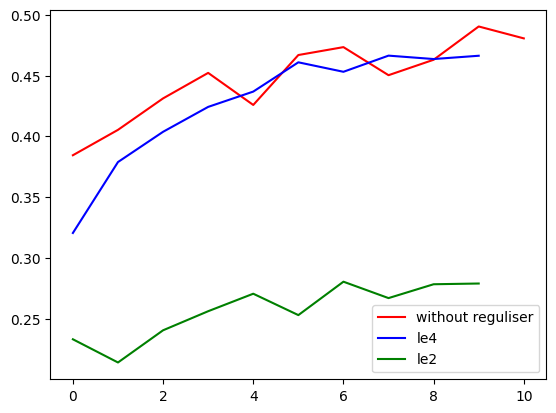

In [19]:
#visualisation
plt.plot(m1.history['val_accuracy'],label='without reguliser',color='red')
plt.plot(m2.history['val_accuracy'],label='le4',color='blue')
plt.plot(m3.history['val_accuracy'],label='le2',color='green')
plt.title='validation accuracy'
plt.xlabel='epochs'
plt.ylable='accuracy'
plt.legend()
plt.show()